<h3>Extract colors from an image</h3>

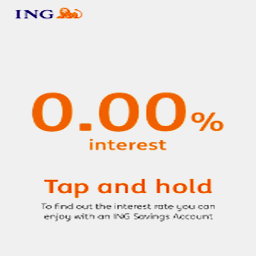

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import sys
import glob

sys.path.append('../app/lib/colors/')
import dominant_colors  as dc
from colors_html import APPROXIMATE_COLORS
im_file = '../data/0af82b2f6969936ff5d498907a733106_92d0724ccdf4f35fce7c.png'

APROX_COL = APPROXIMATE_COLORS()
dc.change_image_depth(Image.open(im_file).resize((256, 256), Image.ANTIALIAS), depth=16)


In [2]:
cols = dc.dominant_colors_from_file(im_file, n_colors=10, mask=False, depth=16, resize=256)
print(cols)

{'total_number_pixels': 65536, 'number_distinct_colors': 36, 0: {'html_color': '#efefef', 'rgb': [239, 239, 239], 'number': 58180, 'fraction': 88.78}, 1: {'html_color': '#f06000', 'rgb': [240, 96, 0], 'number': 2047, 'fraction': 3.12}, 2: {'html_color': '#dfdfdf', 'rgb': [223, 223, 223], 'number': 615, 'fraction': 0.94}, 3: {'html_color': '#f04f00', 'rgb': [240, 79, 0], 'number': 349, 'fraction': 0.53}, 4: {'html_color': '#efefdf', 'rgb': [239, 239, 223], 'number': 349, 'fraction': 0.53}, 5: {'html_color': '#dfdfdf', 'rgb': [223, 223, 223], 'number': 269, 'fraction': 0.41}, 6: {'html_color': '#d0d0d0', 'rgb': [208, 208, 208], 'number': 258, 'fraction': 0.39}, 7: {'html_color': '#efdfcf', 'rgb': [239, 223, 207], 'number': 214, 'fraction': 0.33}, 8: {'html_color': '#c0c0c0', 'rgb': [192, 192, 192], 'number': 186, 'fraction': 0.28}, 9: {'html_color': '#a0a0a0', 'rgb': [160, 160, 160], 'number': 177, 'fraction': 0.27}}


{'html_color': '#efefef', 'rgb': [239, 239, 239], 'number': 58180, 'fraction': 88.78}
approx color is White
{'html_color': '#f06000', 'rgb': [240, 96, 0], 'number': 2047, 'fraction': 3.12}
approx color is Orange
{'html_color': '#dfdfdf', 'rgb': [223, 223, 223], 'number': 615, 'fraction': 0.94}
approx color is lightGray
{'html_color': '#f04f00', 'rgb': [240, 79, 0], 'number': 349, 'fraction': 0.53}
approx color is Orange
{'html_color': '#efefdf', 'rgb': [239, 239, 223], 'number': 349, 'fraction': 0.53}
approx color is White
{'html_color': '#dfdfdf', 'rgb': [223, 223, 223], 'number': 269, 'fraction': 0.41}
approx color is lightGray
{'html_color': '#d0d0d0', 'rgb': [208, 208, 208], 'number': 258, 'fraction': 0.39}
approx color is lightGray
{'html_color': '#efdfcf', 'rgb': [239, 223, 207], 'number': 214, 'fraction': 0.33}
approx color is White
{'html_color': '#c0c0c0', 'rgb': [192, 192, 192], 'number': 186, 'fraction': 0.28}
approx color is lightGray
{'html_color': '#a0a0a0', 'rgb': [160, 

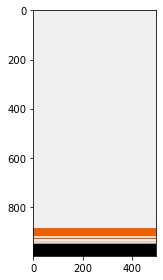

In [3]:
N = 10
img_arr = img_arr=np.zeros((N*100, 500, 3), dtype=int)
min_ = 0
for i in range(N):
    frac = int(cols[i]['fraction'] * N)
    img_arr[min_: min_+frac,:] = cols[i]['rgb']
    min_ += frac
    # see info about this cluster
    print( cols[i])
    print('approx color is', APROX_COL.get_approximate_color([cols[i]['html_color']])[0])

# view this dummy image.
from skimage.io import imshow
imshow(img_arr*1.0/255)

{'total_number_pixels': 7356, 'number_distinct_colors': 35, 0: {'html_color': '#f06000', 'rgb': [240, 96, 0], 'number': 2047, 'fraction': 27.83}, 1: {'html_color': '#f05f10', 'rgb': [240, 95, 16], 'number': 617, 'fraction': 8.39}, 2: {'html_color': '#efefdf', 'rgb': [239, 239, 223], 'number': 349, 'fraction': 4.74}, 3: {'html_color': '#f04f00', 'rgb': [240, 79, 0], 'number': 349, 'fraction': 4.74}, 4: {'html_color': '#dfdfdf', 'rgb': [223, 223, 223], 'number': 269, 'fraction': 3.66}, 5: {'html_color': '#d0d0d0', 'rgb': [208, 208, 208], 'number': 258, 'fraction': 3.51}, 6: {'html_color': '#efdfcf', 'rgb': [239, 223, 207], 'number': 214, 'fraction': 2.91}, 7: {'html_color': '#c0c0c0', 'rgb': [192, 192, 192], 'number': 186, 'fraction': 2.53}, 8: {'html_color': '#a0a0a0', 'rgb': [160, 160, 160], 'number': 177, 'fraction': 2.41}, 9: {'html_color': '#ef8f3a', 'rgb': [239, 143, 58], 'number': 172, 'fraction': 2.34}}
{'html_color': '#f06000', 'rgb': [240, 96, 0], 'number': 2047, 'fraction': 27

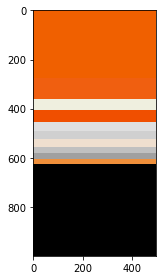

In [4]:

# here mask = True assumes the top left-most pixel is the color we want to ignore
cols = dc.dominant_colors_from_file(im_file, n_colors=10, mask=True, depth=16, resize=256)
print(cols)

N = 10
img_arr = img_arr=np.zeros((N*100, 500, 3), dtype=int)
min_ = 0
for i in range(N):
    frac = int(cols[i]['fraction'] * N)
    img_arr[min_: min_+frac,:] = cols[i]['rgb']
    min_ += frac
    # see info about this cluster
    print( cols[i])
    print('approx color is', APROX_COL.get_approximate_color([cols[i]['html_color']])[0])

# view this dummy image.
from skimage.io import imshow
imshow(img_arr*1.0/255)
